# Generalizing to Higher Dimensions

## Intro

Linear algebra generalizes everything we know about 2D and 3D geometry to study data in any number of dimensions. This means that the machinery we've see on vectors, linear transformations, and matrices can still be useful.

In this chapter we'll define **vector spaces**. Vector spaces are collections of objects we can treat like vectors. These can be arrows in the plane, tuples of numbers, or objects completely different from the ones we've used so far. For example, you can treat images as vectors and take a linear combination of them.

The key operations in a vector space are vector addition and scalar multiplication. With these you can make linear combinations (negation, subtraction, weighted averages, ...) and you can reason about which transformations are linear.

We'll also deep dive on the meaning of the word dimension, and we'll see that images are 270,000 dimensional objects.

## Generalizing our definition of vectors

Python is an object-oriented language, and we can use that for generalization. Through inheritance, you can create new classes of object that inherit properties and behaviors from an existing parent class.

| NOTE: |
| :---- |
| We already used inheritance in our `vec2d.graph` and `vec3d.graph` libraries to reduce the amount of code for drawing the different elements, and also to make the code more succinct. |

### Creating a class for 2D coordinate vectors

Here we include the implementation notes for the code in [12: Vec class library](../../02_mini-projects/12-vec-class-lib/README.md).


We create a class `Vec2` in which we define the vector operations as class methods.

We foster an immutable approach. For example, `v.add(w)` returns a new vector rather than modifying the one in which add is invoked.

By default, Python compares instances by their references rather than their values. In order to make comparisons more sensible, we override the `==` operator so that we can compare vectors by value. Ultimately, this means overriding the `__eq__` method.

As Python supports operator overloading, it is only natural to make use of it for vectors. Thus, we will be able to do `v + w`, `w * s` and `s * w` instead of the equivalent `v.add(w)` and `v.scale(s)`. In order to do so, you just need to override the methods: `__add__`, `__mul__` (when the class in on the left of the expression `w * s`), and `__rmul__` (when the class in on the right of the expression `s * w`).

Also, we implement a user-friendly description for class instances:
+ `__repr__` is intended for debugging and development.
+ `__str__` is intended for showing a descriptive information intended for users of the code.

### Repeating the process with 3D vectors

We can right away repeat the approach for 3D vectors.

With 2D and 3D implemented we can start thinking about generalizations. While there are many ways to do so, we want to generalize *how we use the vectors* rather than focusing on code reuse, or simplifying certain arithmetic operations.

For example, after the generalization we want to be able to write:

```python
def average(v1, v2):
  return 0.5 * v1 + 0.5 * v2
```

And we don't want the user of our library to specify whether `v1` and `v2` are 2D or 3D vectors. In fact, we want to use it with images!

### Building a Vector base class

To create the vector base class use:

```python
from abc import ABC
class Vector(ABC):
```

Decorate abstract methods in the base class with:

```python
from abc import ABC, abstractmethod

@abstractmethod
def scale(self, scalar):
  pass
```

An abstract class with abstract methods cannot be instantiated &mdash; you'll get a `TypeError` if you try to.

With the abstract methods defined, you can define a few other methods that depend on the abstract ones, like `__add__`, `__mul__`, and `__rmul__`.

Then you can simplify the implementation of `Vec2` and `Vec3` class to benefit from the base class, and remove the implementation of `__add__`, `__mul__`, and `__rmul__` which will be inherited from the base class.

Now we can start adding methods that we think will be useful, such as `subtract` and `__sub__`.


### Defining Vector Spaces

In Math, a vector is defined by what it does, rather than what it is.

For example, a vector must be object equipped with a *suitable* way to add it to other vectors and multiply it by scalars.

By *suitable* we mean a few rules these operations must comply with.

Specifically:

1. Adding vectors in any order shouldn't matter: $ \vec{v} + \vec{w} = \vec{w} + \vec{v} $ for any vectors $ \vec{v} $ and $ \vec{w} $.

2. Adding vectors in any grouping shouldn't matter: $ \vec{u} + (\vec{v} + \vec{w}) = (\vec{u} + \vec{v}) + \vec{w} $. As a corolary, $ 3 \vec{v} = \vec{v} + \vec{v} + \vec{v} $.

3. If $ a $ and $ b $ are scalars and $ \vec{v} $ is a vector, then $ a \cdot (b \cdot \vec{v}) $ should be the same as $ (a \cdot b) \cdot \vec{v} $.

4. Multiplying a vector by 1 should leave it unchanged: $ 1 \cdot \vec{v} = \vec{v} $.

5. Addition of scalars should be compatible with scalar multiplication: $ a \cdot \vec{v} + b \cdot \vec{v} = (a + b) \cdot \vec{v} $.

6. Addition of vectors should be compatible with scalar multiplication: $ a \cdot (\vec{v} + \vec{w}) $ should be the same as $ a \cdot \vec{v} + a \cdot \vec{w} $.

A vector space is a collection of objects called vectors, equipped with suitable vector addition and scalar multiplication operations obeying the six rules stated above, such that every linear combination of vectors in the collection produces a vector that is also in the collection.

For example the collection: `[Vec2(1, 0), Vec2(5, -3), Vec2(1.1, 0.8)]` is a group of vectors that can be added and multiplied, but they do not form a vector space because:

```python
1 * Vec2(1, 0) + 1 * Vec2(5, -3) = Vec2(6, -3)
```

And `Vec(6, -3)` is not part f the collection.

By contrast, the collection of all possible 2D vectors is a vector space.

There are two implications of the fact that vector spaces need to contain all their scalar multiples, and these implications are important enough to mention.

1. No matter what vector $ \vec{v} $ you pick in a vector space, $ 0 \cdot \vec{v} $ yields the *zero vector* denoted as $ \vec{0} $. Adding the zero vector to any vector leaves the vector unchanged: $ \vec{0} + \vec{v} = \vec{v} + \vec{0} = \vec{v} $.

2. Every vector has an opposite vector $ -1 \cdot \vec{v} $. This is because of rule #5, $ \vec{v} + \vec{-v} = (1 - 1) \cdot \vec{v} = 0 \cdot \vec{v} = \vec{0} $.

### Unit testing vector space classes

In Math, the usual way to guarantee *suitability* is by writing a proof. In Python, we do so by writing unit tests.

In Python, we also typically rely on brute force provided by CPU rathern than finding an *algebraic proof* as we do in Math. For example, we can rely on getting random scalars and vectors to check certain rules:

In [2]:
from random import uniform
from vec2 import Vec2

def random_scalar():
    return uniform(-10, 10)

def random_vec2():
    return Vec2(random_scalar(), random_scalar())

a = random_scalar()
u, v = random_vec2(), random_vec2()

assert a * (u + v) == a * u + a * v

AssertionError: 

While intuition tells us that the previous snippet should work ok it will most surely fails.

This happens because vector coordinates will be represented as floats, and they will differ by a small amount.

We can get rid of the error using `math.isclose`

In [3]:
from random import uniform
from math import isclose
from vec2 import Vec2

def random_scalar():
    return uniform(-10, 10)

def random_vec2():
    return Vec2(random_scalar(), random_scalar())

def approx_equal_vec2(u, v):
    return isclose(u.x, v.x) and isclose(u.y, v.y)

a = random_scalar()
u, v = random_vec2(), random_vec2()

assert approx_equal_vec2(a * (u + v), a * u + a * v)

Again, testing this by a single sample doesn't look like a strong enough proof. But we can use the power of the CPU to test by a large number of samples and for all the six rules:

In [19]:
from random import uniform
from math import isclose
from vec2 import Vec2
import time

def random_scalar():
    return uniform(-10, 10)

def random_vec2():
    return Vec2(random_scalar(), random_scalar())

def approx_equal_vec2(u, v):
    return isclose(u.x, v.x) and isclose(u.y, v.y)

def test_space_vector_rules(eq, a, b, u, v, w):
    assert eq(u + v, v + u)
    assert eq(u + (v + w), (u + v) + w)
    assert eq(a * (b * v), (a * b) * v)
    assert eq(1 * v, v)
    assert eq((a + b) * v, a * v + b * v)
    assert eq(a * v + a * w, a * (v + w))

start_t = time.time()

for _ in range(0, 100):
    a, b = random_scalar(), random_scalar()
    u, v, w = random_vec2(), random_vec2(), random_vec2()
    test_space_vector_rules(approx_equal_vec2, a, b, u, v, w)
print(f"Test took {(time.time() - start_t):.3f} sec")

Test took 0.001 sec


It took less that 1 thousand of a second to test 100 samples. We could typically allow then to run more than 1000 samples and it will still be a very quick test. 

Testing with these sort of assertions are OK for Jupyter notebooks, but in programs you almost always rely on a unit test framework like [unittest](https://docs.python.org/3/library/unittest.html) (the Unit Test framework that comes with Python stdlib) or PyTest.

You can review the test classes from [12: Vec class library](../../02_mini-projects/12-vec-class-lib/README.md) for examples using [unittest](https://docs.python.org/3/library/unittest.html).

### Exercise

Implement a `CoordinateVector` class inheriting from `Vector` with an abstract property representing the dimension. This should save repetitious work when implementing specific coordinate vector classes. Inheriting from `CoordinateVector` and setting the dimension to `6` should be all you need to implement a `Vec6` class.

The implementation can be found in [CoordinateVector](../../02_mini-projects/12-vec-class-lib/coordvec/coordveclib.py).

The relevant details of the implementation follows.

The implementation relies on the tuple representation of vectors that we used in `vec3d.math`.

One possible way to represent the dimension is:

```python
from abc import abstractmethod

class CoordinateVector(Vector):
    @classmethod
    @abstractmethod
    def dimension(cls):
        pass
```

While the book suggests this could be implemented as an instance property, but as all the vectors of a given concrete class will have the same dimension, it feels more reasonable to use a class method.

When implementing the `scale` and `add` methods, you need to solve the following challenge:
> You need return an instance of the corresponding class, but you cannot return `CoordinateVector` because it is an abstract class.

In Python, you can do that using:

```python
return self.__class__(<coords>)
```

That will effectively instantiate the concrete subclass.

Another challenge is the implementation of the `__repr__` method, because ideally we should be following the `Vec2(x, y)` approach.

That is possible using `self.__class__.__qualname__`:

```python
def __repr__(self):
    return f"{self.__class__.__qualname__}{self.coordinates}"
```

With the implementation in place you'll be able to do:

In [2]:
from coordvec import CoordinateVector

class Vec6(CoordinateVector):
    @classmethod
    def dimension(cls):
        return 6

u = Vec6(1, 2, 3, 4, 5, 6)
v = Vec6(11, 12, 13, 14, 15, 16)

print(u + v)
print(10 * u)

(12, 14, 16, 18, 20, 22)
(10, 20, 30, 40, 50, 60)


### Exercise

Add a `zero` abstract method to the `Vector` class to return the zero vector in a given vector space, as well as an implementation for the negation operator.

These are useful because we're required to have a zero vector and negations of any vector in a vector space.

The solution is implemented in [12: Vector class library](../../02_mini-projects/12-vec-class-lib/).

These are the details.

In the `Vector` class we define the `zero` abstract class method and we implement the `__neg__` operator banking on the capabilities already defined:

```python
class Vector(ABC):
    """Abstract class for vectors"""

    @classmethod
    @abstractmethod
    def zero(cls):
        ...

...
    def __neg__(self):
        return self.scale(-1)
```

While the exercise suggests we should be defining `zero` as a property, the latest documentation states that it is no longer possible to do so:
> Changed in version 3.11: Class methods can no longer wrap other descriptors such as property()

See https://docs.python.org/3.11/library/functions.html#classmethod

Note that the only minor change is that `zero` will have to be invoked with parentheses, as it is method and not a property.

Then, we can provide the implementation of `zero` in our examples `vec2`, `vec3`, and `CoordinateVector`.
In particular, the implementation for `CoordinateVector` can be concrete:

```python
class CoordinateVector(Vector):

    @classmethod
    def zero(cls):
        return cls(*tuple(0 for _ in range(cls.dimension())))
```

### Exercise

Write unit tests to show that the addition and scalar multiplication operations defined for `Vec3` satisfy the vector space properties.

You can find the unit tests, with a little bit of refactoring, on [12: Vector class library](../../02_mini-projects/12-vec-class-lib/).

In the example, you can see how a helper class `TestUtils` was created to collect some common codes.

### Exercise

Add unit tests to check that $ \vec{0} + \vec{v} = \vec{v} $, $ 0 \cdot \vec{v} = \vec{0} $, and $ -\vec{v} + \vec{v} = \vec{0} $.

With the refactoring introduced in the previous exercise, we just need update the `check_vector_space_rules` method to add the new rules:

```python
class TestUtils(unittest.TestCase):
    """Utility methods"""
...

    def check_vector_space_rules(self, eq_fn, a, b, u, v, w):
        # Required for vector spaces
        self.assertTrue(eq_fn(u + v, v + u))
        self.assertTrue(eq_fn(u + (v + w), (u + v) + w))
...
        # Corollaries
        zero_v = u.__class__.zero()
        self.assertTrue(eq_fn(zero_v + u, u))
        self.assertTrue(eq_fn(0 * u, zero_v))
        self.assertTrue(eq_fn(-v + v, zero_v))
```

The only interesting point is that because `zero()` is a class method you cannot use polymorphism right away.

However, you can use the trick:

```python
zero_v = u.__class__.zero()
```

to obtain a representation of the zero vector for the corresponding class of `u`.

### Exercise

The implementation of the equality function is too forgiving, making `Vec2(1, 2) == Vec3(1, 2, 3)` returns `True`. Fix this by adding a check so that classes match before testing for vector equality. Fix also the approx. equal check used in the tests.

Additional guards need to be added to the different classes to check that vector classes added or compared are compatible.

For `Vec2` and `Vec3` is easy:

```python
    def add(self, other):
        if not isinstance(other, Vec2):
            raise TypeError("Incompatible vectors")
        return Vec2(self.x + other.x, self.y + other.y)

    def __eq__(self, other):
        return (
            self.__class__ == other.__class__
            and self.x == other.x
            and self.y == other.y
        )
```

For `CoordinateVector` is a bit more complex, as the comparison `self.class == other.__class__` was failing in the tests for compatible classes.

Therefore, the following guards were added:

```python
def add(self, other):
    if not isinstance(other, CoordinateVector) or len(
        self.coordinates
    ) != len(other.coordinates):
        raise TypeError("Incompatible vectors")
    return self.__class__(*add(self.coordinates, other.coordinates))

def __eq__(self, other):
    if not isinstance(other, CoordinateVector) or len(
        self.coordinates
    ) != len(other.coordinates):
        return False
    return all(
        [
            coord_u == coord_v
            for coord_u, coord_v in zip(self.coordinates, other.coordinates)
        ]
    )
```

### Exercise

Implement a `__truediv__` function on `Vector` that allows you to divide vectors by scalars. You can divide vectors by a non-zero scalar by multiplying them by the reciprocal of the scalar `(1.0 / scalar)`.

## Exploring different vector spaces

In this section, we take a new kind of object and implement it as a class that inherits from `Vector`. As a result, we'll be able to do addition, scalar multiplication, etc. no matter what type of object it is.

### Enumerating all coordinate vector spaces

We've already worked with `Vec2` and `Vec3` which are easy to picture as points on the 2D plane and points in the 3D space.

We can also think about `Vec1`: vectors with a single coordinate. The implementation can be found in [`Vec1`](../../02_mini-projects/12-vec-class-lib/vec1/vec1lib.py).

In [3]:
from vec1 import Vec1

print(repr(Vec1(1) + Vec1(2)))
print(repr(3 * Vec1(5)))

Vec1(3)
Vec1(15)


As we can see, it is just a wrapper over a single number, and it doesn't give any arithmetic knowledge we didn't already have.

What is worth mentioning is that numbers on their own are vectors: integers, fractions, and irrational numbers (denoted as $ \mathbb{R} $) are a vector space in its own right.

Coordinate vector spaces are denoted as $ \mathbb{R}^n $, where $ n $ is the dimension or number of coordinates. For example, the 2D plane is denoted as $ \mathbb{R}^2 $ and $ \mathbb{R}^3 $.

As long as you use real numbers as your scalars, any vector space you stumble across will be some $ \mathbb{R}^n $ in disguise.

The other vector space worth mentioning is $ \mathbb{R}^0 $. This is the set of vectors with zero coordinates. It is also a vector space (see [`Vec0`](../../02_mini-projects/12-vec-class-lib/vec0/vec0lib.py).

No coordinates don't mean there are no possible vectors; it means there is exactly one zero-dimensional vector.

In [5]:
from vec0 import Vec0

print(-3.1 * Vec0())
print(Vec0() + Vec0())

()
()


There is also a vector space $ \mathbb{R}^{\infty} $, but there are many other infinitely dimensional vector space.

### Identifying vector spaces in the wild

Consider a dataset containing details about used cars that looks like:

```json
[
  [
    "Post status",
    "Year",
    "Model",
    "Miles",
    "Price",
    "Source",
    "Time Posted",
    "Location",
    "Title & Link"
  ],
  [
    "For Sale",
    "2005",
    "Prius",
    "114000",
    "3500",
    "craigslist",
    "11/30 - 06:44",
    "San Francisco, CA",
    "toyota prius "
  ],
  [
    "For Sale",
    "2015",
    "Prius",
    "n/a",
    "12500",
    "craigslist",
    "11/30 - 07:00",
    "Seattle, WA",
    "Toyota prius 2015 "
  ],
  ...
]
```

In order to work with them in Python, we should begin by creating a class for them:

```python
class CarForSale:
  def __init__(self, model_year, mileage, price, posted_datetime, model, source, location, description):
    self.model_year = model_year
    self.mileage = mileage
    self.price = price
    self.posted_datetime = posted_datetime
    self.model = model
    self.source = source
    self.location = location
    self.description = description
```

It would be useful to think of `CarForSale` objects as vectors. That would let us average them together (as a linear combination) and see what the typical car for sale looks like.

While it is easy to define what adding two cars will mean when considering the numeric properties such as `mileage`, `price`, or even `year`, there's no way we can do arithmetic on strings. In order to solve that we can set all the string properties to `"(virtual)"` as when doing arithmetics with them we won't be dealing with real cars.

For dates we will use time spans. For example, you can use the day the data was retrieved as a reference point and add the time spans since the cars were posted for sale. By doing so we will be able to sum dates by adding the difference between the corresponding date to our reference date (spans).

With that implementation done (you can review in [CarForSale](../../02_mini-projects/12-vec-class-lib/car_for_sale/car_for_sale_lib.py)), you can start treating those objects as vectors:

In [1]:
from car_for_sale import CarForSale

cars = CarForSale.load_cars_from_dataset()
print(cars[0])

(model_year=2005, mileage=114000.0, price=3500.0, posted_datetime=2018-11-30 06:44:00, model=Prius, source=craigslist, location=San Francisco, CA, description=toyota prius )


In [ ]:
from car_for_sale import CarForSale

cars = CarForSale.load_cars_from_dataset()
print(cars[1])

In [2]:
from car_for_sale import CarForSale

cars = CarForSale.load_cars_from_dataset()
print(cars[0] + cars[1])

(model_year=4012, mileage=306000.0, price=6100.0, posted_datetime=2013-10-27 03:59:00, model=(virtual), source=(virtual), location=(virtual), description=(virtual))


Adding up cars don't seem very useful, but once defined as vectors we can start computing car averages:

In [1]:
from car_for_sale import CarForSale

cars = CarForSale.load_cars_from_dataset()
average_car = sum(cars, CarForSale.zero()) * (1.0 / len(cars))

print(average_car)

(model_year=2012.5365853658536, mileage=87731.63414634147, price=12574.731707317074, posted_datetime=2018-11-30 09:00:49.756098, model=(virtual), source=(virtual), location=(virtual), description=(virtual))


With that simple operation we can see that the average car is from 2012, with a mileage of about 88,000 miles and a price of $12,500. Also, the ad was posted around the 30th of Nov, 2018.

Thus, we've created a `CarForSale` vector that represents records in a dataset. `CarForSale` behaves like a 4D vector having as dimensions the price, model year, mileage and datetime of posting.

### Treating functions as vectors

Functions that take in a real number and return a single real number can also be thought of as vectors.

The mathematical shorthand to designate that function is:

$
f: \mathbb{R} \rightarrow \mathbb{R}
$

and in Python, that would be:

```python
f(x: float) -> float:
  ...
```

As with other vector spaces, we can do addition and scalar multiplication of functions visually or algebraically.

For example, we can start with the functions $ f(x) = 0.5 \cdot x + 3 $ and $ g(x) = sin(x) $.

We can also define a simple `plot` helper function to get the graph of those functions on a given interval:

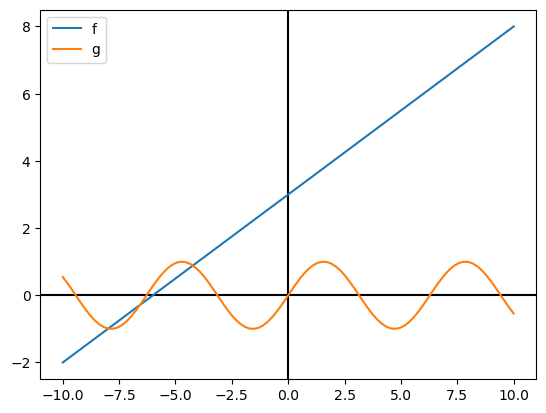

In [7]:
from math import sin
import numpy as np
import matplotlib.pyplot as plt

def plot(fs, xmin, xmax, fn_names):
    xs = np.linspace(xmin, xmax, 100)
    fig, ax = plt.subplots()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    for f, fn_name in zip(fs, fn_names):
        ys = [f(x) for x in xs]
        plt.plot(xs, ys, label=fn_name)
    ax.legend()


def f(x):
    return 0.5 * x + 3

def g(x):
    return sin(x)

plot([f, g], -10, 10, ["f", "g"])

Algebraically, we can add functions by adding the expressions that define them.

This means $ f + g $ is a function defined by:

$
(f + g)(x) = f(x) + g(x) = 0.5 \cdot x + 3 + sin(x)
$

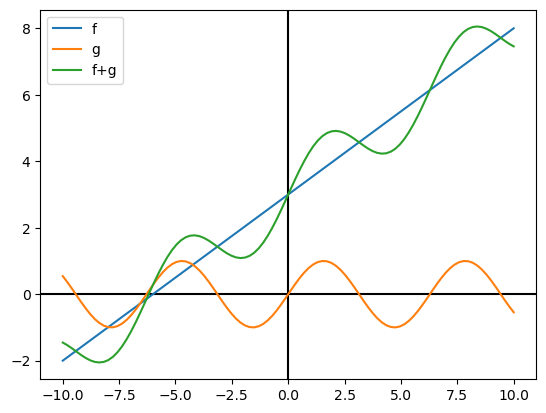

In [8]:
from math import sin
import numpy as np
import matplotlib.pyplot as plt

def plot(fs, xmin, xmax, fn_names):
    xs = np.linspace(xmin, xmax, 100)
    fig, ax = plt.subplots()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    for f, fn_name in zip(fs, fn_names):
        ys = [f(x) for x in xs]
        plt.plot(xs, ys, label=fn_name)
    ax.legend()


def f(x):
    return 0.5 * x + 3

def g(x):
    return sin(x)

def add_functions(f, g):
    def new_function(x):
        return f(x) + g(x)
    return new_function

plot([f, g, add_functions(f, g)], -10, 10, ["f", "g", "f+g"])

Likewise, we can multiply a function by a scalar by multiplying its expression by the scalar.

For example, $ 3g = 3 \cdot g(x) = 3 \cdot sin(x) $.

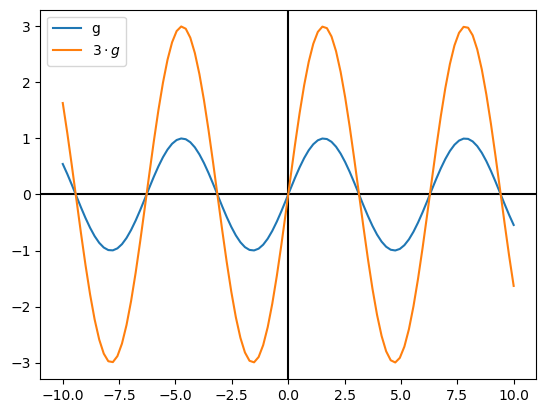

In [11]:
from math import sin
import numpy as np
import matplotlib.pyplot as plt

def plot(fs, xmin, xmax, fn_names):
    xs = np.linspace(xmin, xmax, 100)
    fig, ax = plt.subplots()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    for f, fn_name in zip(fs, fn_names):
        ys = [f(x) for x in xs]
        plt.plot(xs, ys, label=fn_name)
    ax.legend()


def g(x):
    return sin(x)

def scale_function(f, scalar):
    def new_function(x):
        return scalar * f(x)
    return new_function

plot([g, scale_function(g, 3)], -10, 10, ["g", r"$3 \cdot g$"])

It's possible to nicely wrap Python functions in a class that inherits from vector.

You can even make the class *callable* so that it can accept arguments as if it were a function to be able to write expressions such as `(f+g)(6)`.

However, unit testing such a class is much harder because there is no easy way to generate random functions, or to test whether two functions are equal (to test that two functions are equal, they will have to return the exact same output for every single possible input).

This brings another question: what is the dimension of the vector space of functions?

That is the same as: how many real number coordinates are needed to uniquely identify a function?

As you can guess, the vector space of functions is infinite.

### Treating matrices as vectors

Because an n-by-m matrix is a list of $ n \cdot m $ numbers arranged in a particular way, we can treat it as an $ n \cdot m $-dimensional vector.

We've already seen how matrix addition and multiplication of a matrix by an scalar works.

For example, we can implement a class `Matrix_5x3` that inherits from `Vector`.

```python
class Matrix5x3(Vector):
    rows = 5
    columns = 3

    def __init__(self, matrix):
        self.matrix = matrix

    @classmethod
    def zero(cls):
        return Matrix5x3(
            tuple(tuple(0 for _ in range(cls.columns)) for _ in range(cls.rows))
        )

    def add(self, other):
        if not isinstance(other, Matrix5x3):
            raise TypeError("Incompatible vectors")

        return Matrix5x3(
            tuple(
                tuple(a + b for a, b in zip(row1, row2))
                for row1, row2 in zip(self.matrix, other.matrix)
            )
        )

    def scale(self, scalar):
        return Matrix5x3(
            tuple(tuple(scalar * elem for elem in row) for row in self.matrix)
        )

    def __eq__(self, other):
        if self.__class__ != other.__class__:
            return False
        for r1, r2 in zip(self.matrix, other.matrix):
            for e1, e2 in zip(r1, r2):
                if e1 != e2:
                    return False
        return True

    def __str__(self):
        """User-friendly representation for users of the code"""
        return str(self.matrix)

    def __repr__(self):
        """Dev-friendly representations for debugging purposes"""
        return f"Matrix5x3{repr(self.matrix)}"

```

In this case, we deal with 15-dimension vectors: you need 15 numbers to completely specify a vector.

In the same way, you could just as well create a `Matrix2x2` or `Matrix99x17` to represent different vector spaces.

As a matter of fact, you could create a `MatrixMxN` class and inherit from it to represent any matrix.

We also know from the previous chapter that matrices represent linear functions. Therefore, linear functions in the sense $ A: \mathbb{R^m} \rightarrow \mathbb{R^n} $, are also vector spaces &mdash; we don't care whether we think of them as grids of numbers or as functions.

### Manipulating images with vector operations